In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('../data/air.csv')
data.head(3)

,time,city,AQI,PM2.5,PM10,SO2,NO2,CO,O3,primary_pollutant
0,2014-12-31,阿坝州,53,33,55,3,23,1.0,35.0,PM10
1,2015-01-31,阿坝州,31,18,29,7,10,0.5,45.0,NaN
2,2015-01-30,阿坝州,34,19,30,7,13,0.6,48.0,NaN


In [2]:
data.shape # 查看行列数

(557424, 10)

In [3]:
data.columns # 查看字段名

Index(['time', 'city', 'AQI', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
       'primary_pollutant'],
      dtype='object')

In [4]:
data.dtypes # 查看数据类型

time                  object
city                  object
AQI                    int64
PM2.5                  int64
PM10                   int64
SO2                    int64
NO2                    int64
CO                   float64
O3                   float64
primary_pollutant     object
dtype: object

In [5]:
# 查看重复值数量
data.duplicated().sum()

1702

In [6]:
# 查看重复行
data[data.duplicated()]

,time,city,AQI,PM2.5,PM10,SO2,NO2,CO,O3,primary_pollutant
472603,2013-12-31,北京,99,50,148,23,49,1.2,34.0,PM10
472604,2013-12-30,北京,67,43,84,28,53,1.1,26.0,PM10
472605,2013-12-29,北京,78,58,87,48,76,1.7,16.0,PM2_5
472606,2013-12-28,北京,31,11,18,11,21,0.3,19.0,NaN
472607,2013-12-27,北京,23,16,21,19,34,0.6,24.0,NaN
...,...,...,...,...,...,...,...,...,...,...
474300,2018-07-05,北京,173,71,109,4,35,1.2,NaN,臭氧
474301,2018-07-04,北京,172,59,84,3,30,0.9,NaN,臭氧
474302,2018-07-03,北京,122,54,69,3,24,0.9,NaN,臭氧
474303,2018-07-02,北京,110,44,58,3,24,0.9,NaN,臭氧


In [7]:
# 删除重复行
df = data.drop_duplicates()
df.shape

(555722, 10)

In [8]:
df.isnull().sum()

time                      0
city                      0
AQI                       0
PM2.5                     0
PM10                      0
SO2                       0
NO2                       0
CO                        0
O3                   344976
primary_pollutant     28758
dtype: int64

In [9]:
AQI_min = data.AQI.min()
AQI_max = data.AQI.max()
display(AQI_min, AQI_max)

0

1210

In [10]:
AQI_cut = pd.cut(data.AQI, bins=[AQI_min, 50, 100, 150, 200, 300, AQI_max])
AQI_count = AQI_cut.value_counts()
AQI_count

(50, 100]      294778
(0, 50]        124723
(100, 150]      92366
(150, 200]      24405
(200, 300]      13275
(300, 1210]      3678
Name: AQI, dtype: int64

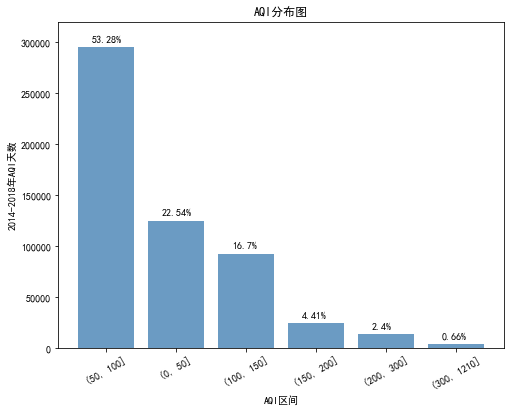

In [11]:
def func1():
    X = np.arange(len(AQI_count))
    Y = AQI_count

    plt.figure(figsize=(8, 6))
    plt.title('AQI分布图')
    plt.bar(X, Y, color='steelblue', alpha=0.8)
    plt.xlabel('AQI区间')
    plt.ylabel('2014-2018年AQI天数')
    plt.xticks(np.arange(len(AQI_count)), AQI_count.index, rotation=30)
    plt.ylim([0, 320000])
    percents = [str(round(i*100, 2)) + '%'for i in AQI_count / AQI_count.sum()]
    for x, y, z in zip(X, Y, percents):
        plt.text(x-0.2, y+5000, z)

func1()

<ipython-input-32-a547ef22f3d1>:10: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(x,


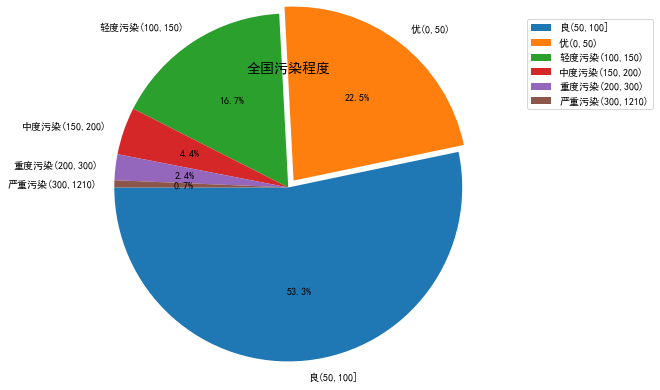

In [32]:
# 全国污染程度饼图
def func2():
    labels = ['良(50,100]', '优(0,50)', '轻度污染(100,150)',
              '中度污染(150,200)', '重度污染(200,300)', '严重污染(300,1210)']
    x = [i for i in AQI_count / AQI_count.sum()]
    
    explode = [0, 0.1, 0, 0, 0, 0]
    plt.figure(figsize=(6,4),facecolor='w')
    
    plt.pie(x,  
            labels=labels,  
            autopct='%.1f%%',  
            startangle=180,  # 设置初始角度
            explode=explode,  # 设置突出显示
            radius=2  # 设置半径
            )
    plt.legend(labels,bbox_to_anchor=[1.7,0.3,0.5,1])
    plt.show()


func2()

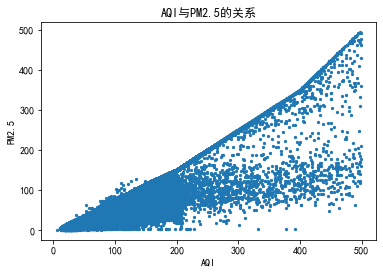

In [13]:
# AQI与PM2.5的关系
def func3(pollutant, num1, num2):
    data2 = data[data[pollutant] < num1]  # 利用drop方法将含有特定数值的列删除
    data2 = data2[data2[pollutant] != 0]
    data2 = data2[data2['AQI'] < num2]
    data2 = data2[data2['AQI'] != 0]
    
    plt.title('AQI与%s的关系' % pollutant)
    plt.scatter(data2.AQI, data2[pollutant], s=5)
    plt.xlabel('AQI')
    plt.ylabel(pollutant)


func3('PM2.5', 700, 500)

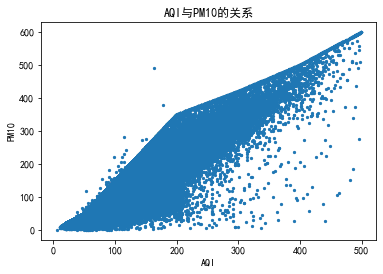

In [14]:
# AQI与PM10的关系
func3('PM10', 1000, 500)

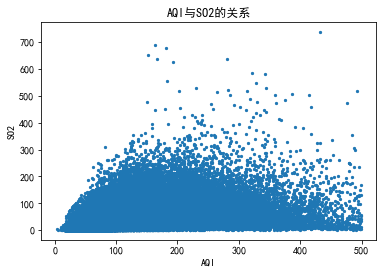

In [15]:
# AQI与SO2的关系
func3('SO2', 800, 500)

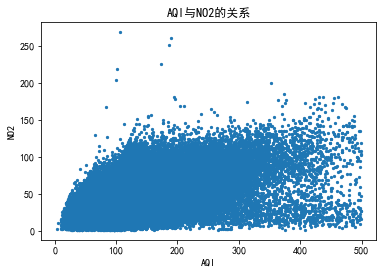

In [16]:
# AQI与NO2的关系
func3('NO2', 300, 500)

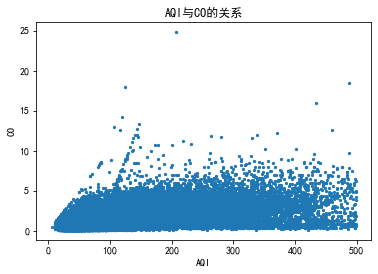

In [17]:
# AQI与CO的关系
func3('CO', 25, 500)

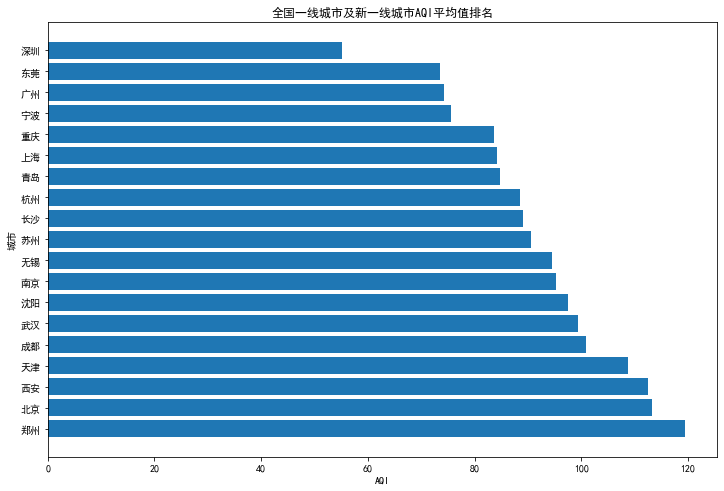

In [18]:
def func4():
    yixian_city = data[(data.city == '北京') | (data.city == '上海') | (data.city == '广州') | (data.city == '深圳') | (data.city == '成都') | (data.city == '杭州') | (data.city == '重庆') | (data.city == '武汉') |
                       (data.city == '苏州') | (data.city == '西安') | (data.city == '天津') | (data.city == '南京') | (data.city == '郑州') | (data.city == '长沙') | (data.city == '沈阳') | (data.city == '青岛') |
                       (data.city == '宁波') | (data.city == '东莞') | (data.city == '无锡')].groupby("city")["AQI"].mean().sort_values(ascending=False)
    
  
    plt.figure(figsize=(12, 8))
    plt.title('全国一线城市及新一线城市AQI平均值排名')      
    plt.barh(np.arange(len(yixian_city)), yixian_city)
    plt.yticks(np.arange(len(yixian_city)), yixian_city.index)
    plt.xlabel('AQI')
    plt.ylabel('城市')


func4()

In [19]:
data['year'] = pd.to_datetime(data['time']).dt.year
data['month'] = pd.to_datetime(data['time']).dt.month
data

,time,city,AQI,PM2.5,PM10,SO2,NO2,CO,O3,primary_pollutant,year,month
0,2014-12-31,阿坝州,53,33,55,3,23,1.0,35.0,PM10,2014,12
1,2015-01-31,阿坝州,31,18,29,7,10,0.5,45.0,NaN,2015,1
2,2015-01-30,阿坝州,34,19,30,7,13,0.6,48.0,NaN,2015,1
3,2015-01-29,阿坝州,31,18,31,7,15,0.5,32.0,NaN,2015,1
4,2015-01-28,阿坝州,29,18,29,7,14,0.6,27.0,NaN,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...
557419,2018-07-05,昆明,36,13,36,11,26,0.6,NaN,—,2018,7
557420,2018-07-04,昆明,27,9,24,11,21,0.5,NaN,—,2018,7
557421,2018-07-03,昆明,28,9,24,11,22,0.5,NaN,—,2018,7
557422,2018-07-02,昆明,28,10,28,10,22,0.6,NaN,—,2018,7


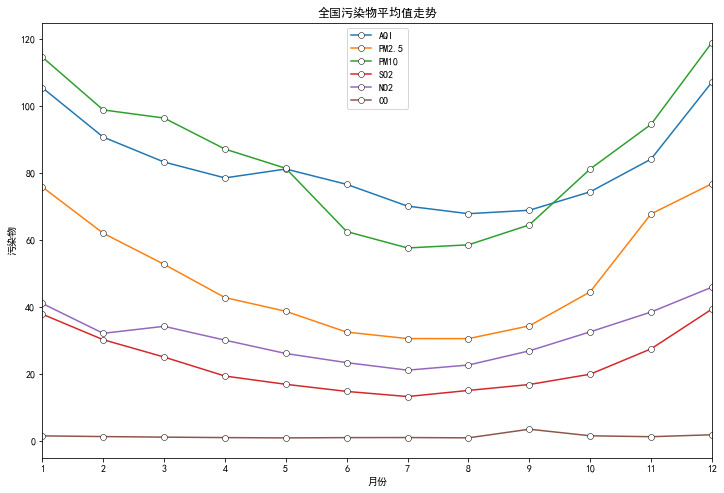

In [20]:
# 全国按月份污染物平均值走势
def func5():
    country_city = data.groupby('month').mean().sort_index()
    country_city2 = country_city[["AQI", "PM2.5", "PM10", "SO2", "NO2", "CO"]]

    plt.figure(figsize=(12, 8))
    plt.title('全国污染物平均值走势')
    plt.plot(country_city2, label=country_city2.columns,
             marker="o", mec="k", mfc="w", mew=0.5)
    plt.legend(country_city2)
    plt.xticks(np.arange(1, 13))
    plt.xlim([1, 12])
    plt.xlabel('月份')
    plt.ylabel('污染物')


func5()

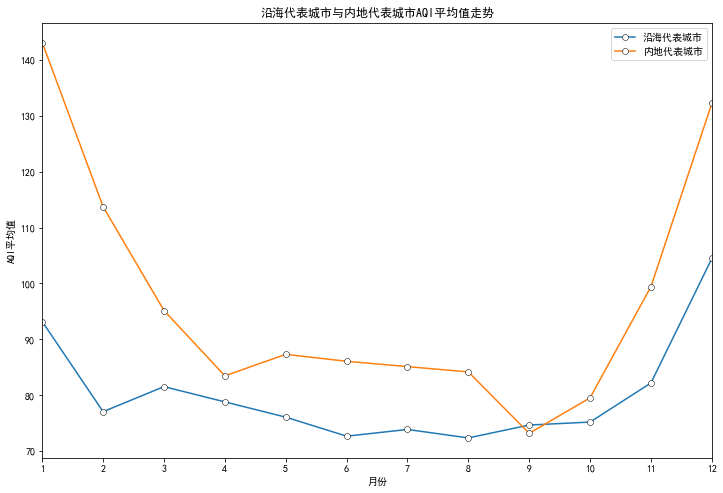

In [21]:
# 沿海代表城市与内地代表城市
def func6():
    yanhai = data[(data.city == '天津') | (data.city == '深圳') | (
        data.city == '广州') | (data.city == '上海')].groupby("month")["AQI"].mean()
    neidi = data[(data.city == '洛阳') | (data.city == '成都') | (
        data.city == '西安') | (data.city == '贵阳')].groupby("month")["AQI"].mean()

    plt.figure(figsize=(12, 8))
    plt.title('沿海代表城市与内地代表城市AQI平均值走势')
    plt.plot(yanhai, label='沿海', marker="o", mec="k", mfc="w", mew=0.5)
    plt.plot(neidi, label='内地', marker="o", mec="k", mfc="w", mew=0.5)
    plt.legend(['沿海代表城市', '内地代表城市'])
    plt.xticks(np.arange(1, 13))
    plt.xlim([1, 12])
    plt.xlabel('月份')
    plt.ylabel('AQI平均值')


func6()

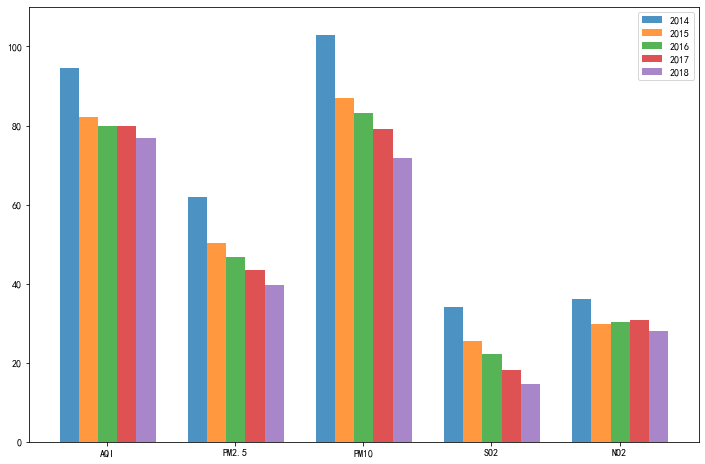

In [22]:
# 每年污染物柱状图
def func7_1(year):
    return [data[data.year == year]['AQI'].mean(),
            data[data.year == year]['PM2.5'].mean(),
            data[data.year == year]['PM10'].mean(),
            data[data.year == year]['SO2'].mean(),
            data[data.year == year]['NO2'].mean()]


def func7():
    plt.figure(figsize=(12, 8))
    labels = ["AQI", "PM2.5", "PM10", "SO2", "NO2"]
    # 设定每个柱子的宽度
    bar_width = 0.15
    x = 0
    for i in [2014, 2015, 2016, 2017, 2018]:
        plt.bar(np.arange(5)+x*bar_width, func7_1(i),
                label=i, alpha=0.8, width=bar_width)
        x += 1
    plt.legend()
    plt.ylim([0, 110])
    plt.xticks([0.295, 1.295, 2.295, 3.295, 4.295], labels)


func7()

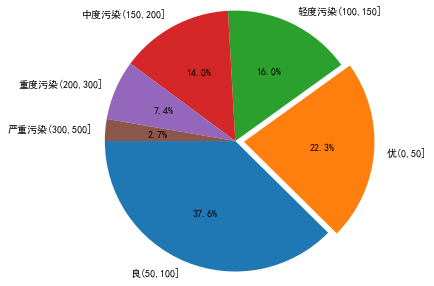

In [23]:
# 北京污染程度饼图
def func8(city):
    # 查看不同价格区间的AQI，在当前数据集中的占比情况
    AQI_max = data[data.city == city].AQI.max()
    AQI_cut = pd.cut(data[data.city == city].AQI, bins=[
                     0, 50, 100, 150, 200, 300, AQI_max])
    AQI_count = AQI_cut.value_counts()
    labels = ['良(50,100]', '优(0,50]', '轻度污染(100,150]',
              '中度污染(150,200]', '重度污染(200,300]', '严重污染(300,%s]' % AQI_max]
    x = [i for i in AQI_count / AQI_count.sum()]
    explode = [0, 0.1, 0, 0, 0, 0]
    plt.pie(x,  # 绘图的数据
            labels=labels,  # 数据标签
            autopct='%.1f%%',  # 设置百分比
            startangle=180,  # 设置初始角度
            explode=explode,  # 设置突出显示
            radius=1.5  # 设置半径
            )


func8('北京')

12

207

<ipython-input-24-18d306524522>:18: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(x=x,  # 绘图的数据


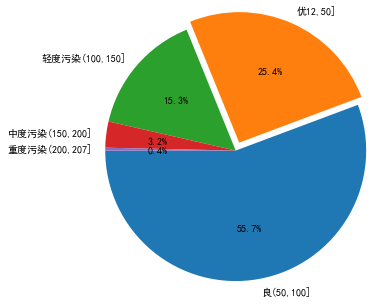

In [24]:
# 广州污染程度饼图
def func9():
    # 查看不同价格区间的AQI，在当前数据集中的占比情况
    AQI_min = data[data.city == '广州'].AQI.min()
    AQI_max = data[data.city == '广州'].AQI.max()
    display(AQI_min, AQI_max)

    AQI_cut = pd.cut(data[data.city == '广州'].AQI, bins=[
                     AQI_min, 50, 100, 150, 200, 207])                 
    AQI_count = AQI_cut.value_counts()

    labels = ['良(50,100]', '优12,50]', '轻度污染(100,150]',
              '中度污染(150,200]', '重度污染(200,207]']

    x = [i for i in AQI_count / AQI_count.sum()]
    
    explode = [0, 0.1, 0, 0, 0]
    plt.pie(x=x,  # 绘图的数据
            labels=labels,  # 数据标签
            autopct='%.1f%%',  # 设置百分比
            startangle=180,  # 设置初始角度
            explode=explode,  # 设置突出显示
            radius=1.5  # 设置半径
            )


func9()

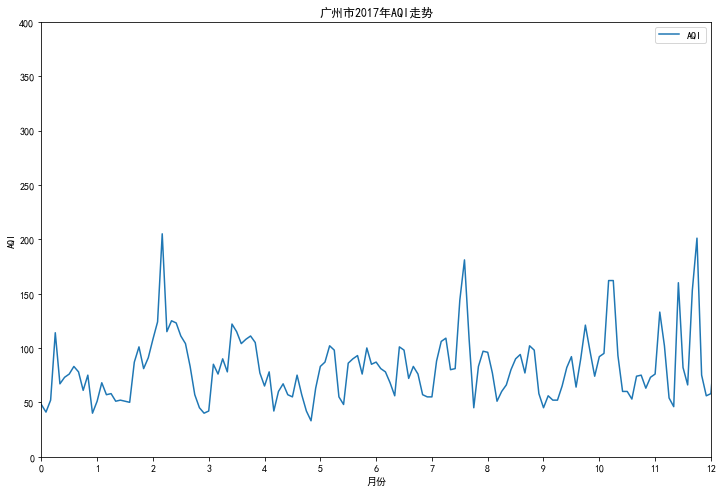

In [25]:
def func11():
    AQI = data[(data.city == '广州') & (data.year == 2017)]["AQI"]
    TIME = data[(data.city == '广州') & (data.year == 2017)]["time"]

    plt.figure(figsize=(12, 8))
    plt.plot(TIME, AQI, "-",label='AQI')
    plt.legend()
    plt.axis([0, 144, 0, 400])  # 画轴的范围
    month = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    plt.xticks(np.arange(0, 144, 11.999), month)  # 重新设置x轴间隔和刻度值
    plt.xlabel('月份')
    plt.ylabel('AQI')
    plt.title('广州市2017年AQI走势')


func11()